#Simulate buffet restaurant

# 1. Team work declaration

## Team
| Student           | Id      |
|-------------------|---------|
| Phạm Văn Bách               | 2252057 |
| Trần Cẩm Hòa               | 2252240 |
| Trần Quốc Khải               | 2252341 |
| Hoàng Phúc               | 2252629 |
| Nguyễn Nhật Khôi               | 2252379 |
| Nguyễn Hoàng Ngọc Tuấn               | 2252873 |

## Workmap declaration

| Last name | Student ID | Design Role | Dev Role | Eval Role | Report Role | Ass1 work description (details in text)  | Rating | week 2 outcome | week 3 outcome | week 4 outcome  |
|-----------|------------|-------------|----------|-----------|-------------|------------------------------------------|-----------------|----------------|----------------|-----------------|
| Phạm Văn Bách        |     2252057       | yes      | no   | no    | yes      |     Design queueing system of a buffet restaurant                                     | A           |       Define  queues in a buffet restaurant        |        Define outcomes of queue simulation         |       Define parameters of queue simulation          |
| Trần Cẩm Hòa        |      2252240      | yes      | no   | no    | yes      |    Design queueing system of a buffet restaurant                                      | A           |       Define  queues in a buffet restaurant         |        Define outcomes of queue simulation        |        Define parameters of queue simulation         |
| Trần Quốc Khải        |        2252341    | no      | yes   | no    | yes      |    Define and implement functions of the queueing system                                    | A           |       Define and implement the system         |       Define and implement the system         |         Test and debug final system        |
| Hoàng Phúc        |     2252629       | no      | yes   | no    | yes      |   Define and implement functions of the queueing system                                       | A           |      Define and implement the system          |      Define and implement the system          |        Test and debug final system         |
| Nguyễn Nhật Khôi        |     2252379       | no      | no   | yes    | yes      |       Compile theories and mathematical formulas                                   | A           |       Define factors of the queue         |        Define the evaluation technique for simulation       |         Select the workloads for simulation       |
| Nguyễn Hoàng Ngọc Tuấn        |      2252873      | no      | no   | yes    | yes      |     Compile theories and mathematical formulas                                     | A           |        Define factors of the queue        |       Define the evaluation technique for simulation         |      Select the workloads for simulation           |
|           |            |             |          |           |             |                                          |                 |                |                |                 |
|           |            |             |          |           |             |                                          |                 |                |                |                 |


# 2.System design

## System Performance Steps

### 1. Define Goal and System
Goal: Simulate a real-world queueing system in a buffet restaurant.

Description of Queues: There are 6 queues in the system:
*   receptionists
*   appetizers
*   main courses
*   desserts
*   beverages
*   tables.

Full system:
Receptionists queue -> \{ Appetizers queue, Main courses queue, Desserts queue, Beverages queue \} -> Tables queue

To view the system visually, please view the picture below
### 2. Service and Outcomes
Service: Serving customers with different workload (simulation step).

Outcomes: Successfully simulating the flow of workload (customers) through six queues in the system


### 3. Select Metrics
*   Total waiting time
*   Reject percentage (Queue is full and customer can not go in queue)
*   Bounce percentage (Customer already in queue, waiting too long and decide to leave)


### 4. List System Parameters


*   Customer arrival rate
*   Each queue service rate
*   Each queue length
*   Each queue server


### 5. List Factors to Study


*   Customer behaviors (Maximum waiting time when already in queue; and Probability to choose one of the four queues: appetizers, main courses, desserts, beverages)
*   Customer arrival rate

### 6. Evaluation Technique

Discrete-event simulation: Because customers arrivals to the system are discrete events
### 7. Select Workload


*   Poisson distribution arrivals to the system
*   Coder add customers to schedule arrivals manually




## System Component/Module description

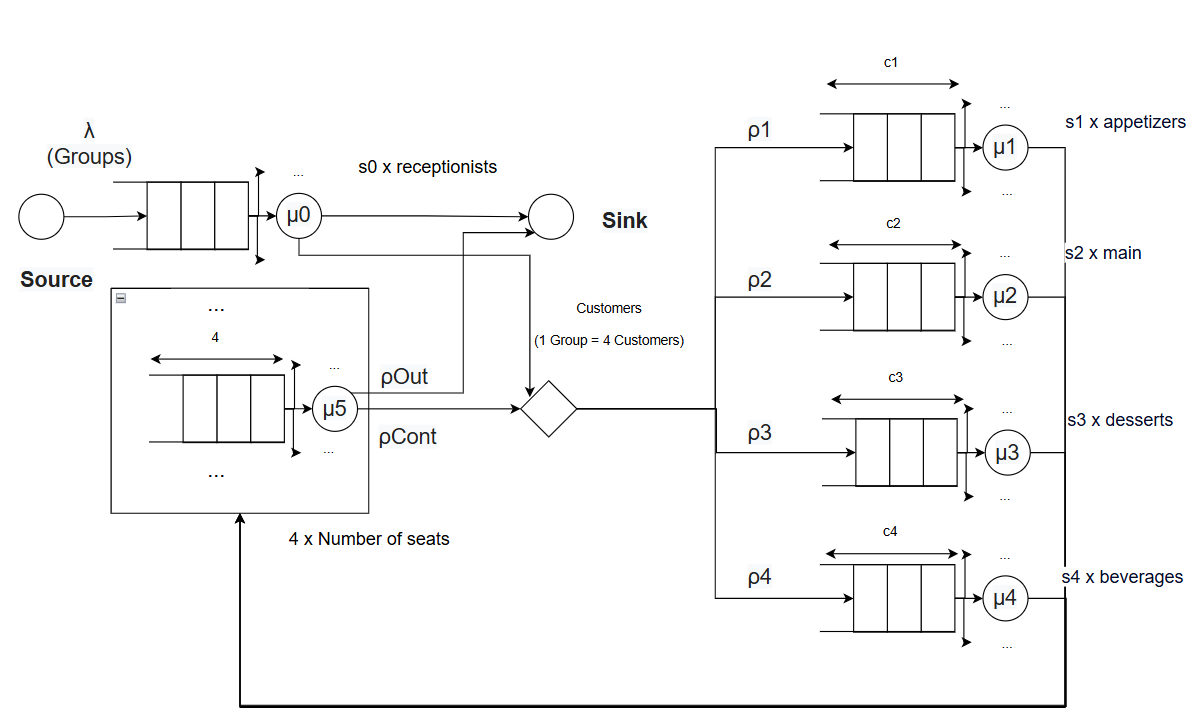

Above is our system overview. One thing to be noted that the arrive rate of "groups" into receptionists (ie first queue of said system). A group then find table using find free table function (ie table queue/ eating queue) then they will be split out into 4 individual "customers".

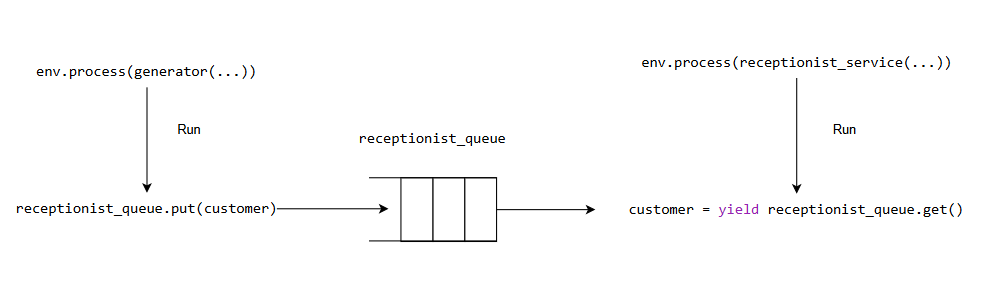

Above is simple workflow of 1 queue in the system (receptionists - a single-queue, multi-server).


A queue working in our system can be divided into 3 parts:



*   The queue itself
*   Add into queue
*   Remove from queue



1.   The queue

The queue itself will be built on global variables:

*   receptionist_servers = simpy.Resource(env, capacity=max_server_size_receptionist)

2.   The addition to queue


For add into the queue, we simply .put() into said queue. Above code is simplification of what exaclty happend in the code. In code, before we add into the queue, we need to check if said queue is empty

*   if len(receptionist_queue.items) >= max_queue_size_receptionist:

If queue empty, we .put(); if not then that customer is "rejected"

3.   The removal from queue


For the removal from queue, there will be only 1 function call "receptionist_service" run on a while loop. The while loop will continue checking if (there is a customer) AND (there is a receptionist_server is free); then we serve the customer: call the receptionist_serving function and yield that free server.


4.   Additional notice

It is to be noted that other queue such as appetizer, main course, dessert, beverages have the same workflow. With exception of the table queue, which only use to simulate the limitation of tables (seats) in the restaurants.



# 3. System Implementation



Install prerequisite library


*   simpy



In [ ]:
!pip install SimPy
!pip install pandas
!pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


Import librarys, and declare global variables, class Customer

In [ ]:
import simpy
import random
import pandas as pd

# Environment setup
env = simpy.Environment()

WaitingTime = []
CustomerInNum = 0
CustomerRejectRecption = 0
####################### Start of changable variables(Parameters) #######################

GlobalDEBUGPrint = False # Whether or not print out all print statement of system


max_queue_size_receptionist = 10 # Queue size of receptionists
max_queue_size_appetizer = 10 # Queue size of appetizers
max_queue_size_main = 10 # Queue size of main
max_queue_size_dessert = 10 # Queue size of dessert
max_queue_size_beverage = 10 # Queue size of beverages


max_server_size_receptionist = 10 # Number of servers of receptionists
max_server_size_appetizer = 10 # Number of servers of appetizers
max_server_size_main = 10 # Number of servers of main
max_server_size_dessert = 10 # Number of servers of desserts
max_server_size_beverage = 10 # Number of servers of beverages

GlobalP1 = 25 # Probability of choosing appetizers
GlobalP2 = 25 # Probability of choosing main
GlobalP3 = 25 # Probability of choosing dessert
GlobalP4 = 25 # Probability of choosing beerages
GlobalPC = 75 # Probability of choosing to coninue
GlobalPO = 25 # Probability of choosing to leave after finish




Receptionis_serving_time = 30 # Service rate of receptionists
Appetizer_serving_time = 30 # Service rate of appetizers
Main_serving_time = 30 # Service rate of main
Dessert_serving_time = 30 # Service rate of desserts
Beverage_serving_time = 30 # Service rate of beverages

# MaxWaitTime = 999999
MaxWaitTime = 25 # Waiting time of waiting before bounce (quit queue)

tables = [simpy.Resource(env, capacity=4) for _ in range(10)]
####################### End of changable variables(Parameters) #######################



receptionist_servers = simpy.Resource(env, capacity=max_server_size_receptionist)
appetizer_servers = simpy.Resource(env, capacity=max_server_size_appetizer)
main_servers = simpy.Resource(env, capacity=max_server_size_main)
dessert_servers = simpy.Resource(env, capacity=max_server_size_dessert)
beverage_servers = simpy.Resource(env, capacity=max_server_size_beverage)

receptionist_queue = simpy.Store(env, capacity=max_queue_size_receptionist)
appetizer_queue = simpy.Store(env, capacity=max_queue_size_appetizer)
main_queue = simpy.Store(env, capacity=max_queue_size_main)
dessert_queue = simpy.Store(env, capacity=max_queue_size_dessert)
beverage_queue = simpy.Store(env, capacity=max_queue_size_beverage)

# Experiment1_CustomerRate = 1
# Experiment1_CustomerMaxNumber = 100
####################### Setup SimPy environment and resources######################
# receptionist_queue = simpy.Store(env)
# appetizer_queue = simpy.Store(env)
# main_queue = simpy.Store(env)
# dessert_queue = simpy.Store(env)
# beverage_queue = simpy.Store(env)
class Customer:
    def __init__(self, env, enter_time, customer_id):
        self.env = env
        self.enter_time = enter_time
        self.customer_id = customer_id  # Unique ID for each customer
        self.time = env.now


## Queuing Node 1

In [ ]:
def receptionist_service(env, receptionist_q1111ueue, servers):
    global receptionist_queue
    global WaitingTime,MaxWaitTime, GlobalDEBUGPrint

    try:
      while True:
        while True:
            if len(receptionist_queue.items) > 0:
                customer = None
                if receptionist_queue.items:
                  customer = receptionist_queue.items[0]
                # Check if any servers are free
                if servers.count < servers.capacity:
                    customer = yield receptionist_queue.get()
                    # env.process(serving(env, customer))
                    env.process(receptionist_serving(env, customer))
                    WaitingTime.append(env.now-customer.enter_time)#############TODO##################
                    env.timeout(1)
                    # env.timeout(60)
                    # print(f"Customer {customer.customer_id} finished being served at time {env.now}")
                else:

                    if customer != None:
                      if (GlobalDEBUGPrint==True):
                        print(f"Customer {customer.customer_id} must wait for a receptionist server (all servers in use) at time {env.now}")
                      if (env.now - customer.time >=MaxWaitTime):##########################################env.now - customer.time >=5 | find_free_table(customer,tables) == None
                        if (GlobalDEBUGPrint==True):
                          print(f"Customer {customer.customer_id} QUIT at time {env.now}")

                        customer = yield receptionist_queue.get()
                        # CustomerQuit(customer)
                      else:
                        yield env.timeout(1)
            else:
                if (GlobalDEBUGPrint==True):
                  print(f"No customers in the receptionist queue at time {env.now}, checking again.")
                yield env.timeout(1)  # No customer, check again after 1 time unit

    except simpy.Interrupt:
      if (GlobalDEBUGPrint==True):
        print("Process stopped at", env.now)



def receptionist_serving(env, customer):
    global GlobalP1,GlobalP2,GlobalP3,GlobalP4,GlobalP5,GlobalPC,GlobalPO, Receptionis_serving_time
    global tables, receptionist_servers, GlobalDEBUGPrint
    with receptionist_servers.request() as request:
      yield request
      if (GlobalDEBUGPrint==True):
        print(f"Customer {customer.customer_id} is being served at receptionist at time {env.now}")



      #yield env.timeout(20)
      # t = random.expovariate(1.0 / Receptionis_serving_time)
      t = random.expovariate(Receptionis_serving_time)
      # interarrivalTimes.append(t)###
      yield env.timeout(t)


      req_idx = find_free_table(customer,tables)
      if (GlobalDEBUGPrint==True):
        print(f" find_free_table(None,tables) = {find_free_table(None,tables)} !!!!!")
      if req_idx != None:
        for n in range (4):
          cid = f"{customer.customer_id}{chr(ord('A') + n)}"
          # a = Customer(env, env.now, customer.customer_id)
          a = Customer(env, env.now, cid)
          a.Table = tables[req_idx].request()
          a.TableIdx = req_idx



          # a.p1 = 20
          # a.p2 = 30
          # a.p3 = 30
          # a.p4 = 20

          # a.pC = 50
          # a.pO = 50
          a.p1 = GlobalP1
          a.p2 = GlobalP2
          a.p3 = GlobalP3
          a.p4 = GlobalP4

          a.pC = GlobalPC
          a.pO = GlobalPO
          DecisionNode1(a)

        #   ################################### START HERE#############################################
        #   env.timeout (5)
        # # Check if queue is full
        #   if len(appetizer_queue.items) >= max_queue_size:
        #       print(f"appetizer queue is full, Customer {a.customer_id} leaves immediately at time {env.now}")
        #       env.process(table_service(a))
        #   else:
        #       appetizer_queue.put(a)###HERE###
        #       print(f"Customer {a.customer_id} enters the appetizer queue at time {env.now}")
        # ################################### END HERE#############################################
          # env.process(table_service(a))



            # print(f"TODOL CREATE customer || Table: {req_idx}")
      else:
        if(GlobalDEBUGPrint==True):
          print(f"NOT ENOUGH TABLE (Customer {customer.customer_id})")
      #print(f"Customer {customer.customer_id} finished service at time {env.now}")


## Queuing node 2


In [ ]:
def appetizer_service(env, appetizer_queue, appetizer_servers):
    global WaitingTime,MaxWaitTime, GlobalDEBUGPrint

    try:
      while True:
        while True:
            if len(appetizer_queue.items) > 0:
                customer = None
                if appetizer_queue.items:
                  customer = appetizer_queue.items[0]
                # Check if any servers are free
                if appetizer_servers.count < appetizer_servers.capacity:
                    customer = yield appetizer_queue.get()
                    env.process(appetizer_serving(env, customer))
                    WaitingTime.append(env.now-customer.enter_time)#############TODO##################
                else:

                    if customer != None:
                      if(GlobalDEBUGPrint==True):
                        print(f"Customer {customer.customer_id} must wait for a appetizer server (all appetizer_servers in use) at time {env.now}")
                      if (env.now - customer.time >=MaxWaitTime):##########################################
                        if(GlobalDEBUGPrint==True):
                          print(f"Customer {customer.customer_id} QUIT appetizer at time {env.now}")

                        customer = yield appetizer_queue.get()
                        CustomerQuit(customer)
                      else:
                        yield env.timeout(1)
            else:
                if(GlobalDEBUGPrint==True):
                  print(f"No customers in the appetizer queue at time {env.now}, checking again.")
                yield env.timeout(1)  # No customer, check again after 1 time unit

    except simpy.Interrupt:
      print("Process stopped at", env.now)

def appetizer_serving(env,customer):
  global appetizer_servers, Appetizer_serving_time,GlobalDEBUGPrint
  with appetizer_servers.request() as request:
    yield request

    # t = random.expovariate(1.0 / Appetizer_serving_time)
    t = random.expovariate(Appetizer_serving_time)
    # interarrivalTimes.append(t)###
    yield env.timeout(t)

    env.process(table_service(customer))
    if(GlobalDEBUGPrint==True):
      print(f"Customer {customer.customer_id} is being served at appetizer_serving at time {env.now}")
    # yield env.timeout(60)

def main_service(env, main_queue, servers):
    global WaitingTime,MaxWaitTime,GlobalDEBUGPrint
    try:
      while True:
        while True:
            if len(main_queue.items) > 0:
                customer = None
                if main_queue.items:
                  customer = main_queue.items[0]
                # Check if any servers are free
                if servers.count < servers.capacity:
                    customer = yield main_queue.get()
                    env.process(main_serving(env, customer))
                    WaitingTime.append(env.now-customer.enter_time)#############TODO##################
                else:

                    if customer != None:
                      if(GlobalDEBUGPrint==True):
                        print(f"Customer {customer.customer_id} must wait for a main server (all servers in use) at time {env.now}")
                      if (env.now - customer.time >=MaxWaitTime):##########################################
                        if(GlobalDEBUGPrint==True):
                          print(f"Customer {customer.customer_id} QUIT main at time {env.now}")

                        customer = yield main_queue.get()
                        CustomerQuit(customer)
                      else:
                        yield env.timeout(1)
            else:
                if(GlobalDEBUGPrint==True):
                  print(f"No customers in the main queue at time {env.now}, checking again.")
                yield env.timeout(1)  # No customer, check again after 1 time unit

    except simpy.Interrupt:
      print("Process stopped at", env.now)

def main_serving(env,customer):
  global main_servers, Main_serving_time
  with main_servers.request() as request:
    yield request

    # t = random.expovariate(1.0 / Main_serving_time)
    t = random.expovariate(Main_serving_time)
    # interarrivalTimes.append(t)###
    yield env.timeout(t)

    env.process(table_service(customer))
    # yield env.timeout(60)

def dessert_service(env, dessert_queue, servers):
    global WaitingTime,MaxWaitTime, GlobalDEBUGPrint
    try:
      while True:
        while True:
            if len(dessert_queue.items) > 0:
                customer = None
                if dessert_queue.items:
                  customer = dessert_queue.items[0]
                # Check if any servers are free
                if servers.count < servers.capacity:
                    customer = yield dessert_queue.get()
                    env.process(dessert_serving(env, customer))
                    WaitingTime.append(env.now-customer.enter_time)#############TODO##################
                else:

                    if customer != None:
                      if(GlobalDEBUGPrint==True):
                        print(f"Customer {customer.customer_id} must wait for a dessert server (all servers in use) at time {env.now}")
                      if (env.now - customer.time >=MaxWaitTime):##########################################
                        if(GlobalDEBUGPrint==True):
                          print(f"Customer {customer.customer_id} QUIT dessert at time {env.now}")

                        customer = yield dessert_queue.get()
                        CustomerQuit(customer)
                      else:
                        yield env.timeout(1)
            else:
                if(GlobalDEBUGPrint==True):
                  print(f"No customers in the dessert queue at time {env.now}, checking again.")
                yield env.timeout(1)  # No customer, check again after 1 time unit

    except simpy.Interrupt:
      if(GlobalDEBUGPrint==True):
        print("Process stopped at", env.now)

def dessert_serving(env,customer):
  global dessert_servers, Dessert_serving_time
  with dessert_servers.request() as request:
    yield request

    # t = random.expovariate(1.0 / Dessert_serving_time)
    t = random.expovariate(Dessert_serving_time)
    # interarrivalTimes.append(t)###
    yield env.timeout(t)

    env.process(table_service(customer))
    # yield env.timeout(60)

def beverage_service(env, beverage_queue, servers):
    global MaxWaitTime, WaitingTime, GlobalDEBUGPrint
    try:
      while True:
        while True:
            if len(beverage_queue.items) > 0:
                customer = None
                if beverage_queue.items:
                  customer = beverage_queue.items[0]
                # Check if any servers are free
                if servers.count < servers.capacity:
                    customer = yield beverage_queue.get()
                    env.process(beverage_serving(env, customer))
                    WaitingTime.append(env.now-customer.enter_time)#############TODO##################
                else:

                    if customer != None:
                      if(GlobalDEBUGPrint==True):
                        print(f"Customer {customer.customer_id} must wait for a beverage server (all servers in use) at time {env.now}")
                      if (env.now - customer.time >=MaxWaitTime):##########################################
                        if(GlobalDEBUGPrint==True):
                          print(f"Customer {customer.customer_id} QUIT beverage at time {env.now}")

                        customer = yield beverage_queue.get()
                        CustomerQuit(customer)
                      else:
                        yield env.timeout(1)
            else:
                if(GlobalDEBUGPrint==True):
                  print(f"No customers in the beverage queue at time {env.now}, checking again.")
                yield env.timeout(1)  # No customer, check again after 1 time unit

    except simpy.Interrupt:
      if(GlobalDEBUGPrint==True):
        print("Process stopped at", env.now)

def beverage_serving(env,customer):
  global beverage_servers, Beverage_serving_time
  with beverage_servers.request() as request:
    yield request

    # t = random.expovariate(1.0 / Beverage_serving_time)
    t = random.expovariate(Beverage_serving_time)
    # interarrivalTimes.append(t)###
    yield env.timeout(t)

    env.process(table_service(customer))
    # yield env.timeout(60)

## Queuing node 3


In [ ]:
def find_free_table(customer,tables):
    for i, table in enumerate(tables):
        #if table.count < table.capacity:   # means available
        if table.count == 0:
            return i
            #req = tables[i].request()
            #customer.table = req
    return None   # no free tables

# tables = [simpy.Resource(env, capacity=4) for _ in range(10)]################################################################


def table_service(customer):
  global tables
  yield env.timeout(30)

  DecisionNode2(customer)

  # print(f"Customer {customer.customer_id} RELAESE finished service at time {env.now}")
  # ################################### START HERE#############################################
  # #for n in range (4):
  # tables[customer.TableIdx].release(customer.Table)#table.count
  # print(f"tables[customer.TableIdx].count = {tables[customer.TableIdx].count} at time {env.now}")
  # print(f" find_free_table(None,tables) = {find_free_table(None,tables)}")
  # ################################### END HERE#############################################

# Setup SimPy environment and resources
# receptionist_queue = simpy.Store(env)
# appetizer_queue = simpy.Store(env)
# main_queue = simpy.Store(env)
# dessert_queue = simpy.Store(env)
# beverage_queue = simpy.Store(env)




## System configuration and execution

In [ ]:
# def generator(env, number, interval_mean, server, service_rate):
def DecisionNode1 (customer):
  global GlobalDEBUGPrint
  if customer.p1 != None and customer.p2 != None and  customer.p3 != None and customer.p1 != None:
    customer.enter_time = env.now

    num = random.randint(1, 100)
    if (num<=customer.p1):
      ################################### START HERE#############################################
        # Check if queue is full
        if len(appetizer_queue.items) >= max_queue_size_appetizer:
            if(GlobalDEBUGPrint==True):
              print(f"appetizer_queue queue is full, Customer {customer.customer_id} leaves immediately at time {env.now}")
            CustomerQuit(customer)
        else:
            appetizer_queue.put(customer)###HERE###
            if(GlobalDEBUGPrint==True):
              print(f"Customer {customer.customer_id} enters the appetizer_queue queue at time {env.now}")
        ################################### END HERE#############################################
    elif (num<=customer.p2):
      ################################### START HERE#############################################
        # Check if queue is full
        if len(main_queue.items) >= max_queue_size_main:
            if(GlobalDEBUGPrint==True):
              print(f"main_queue queue is full, Customer {customer.customer_id} leaves immediately at time {env.now}")
            CustomerQuit(customer)
        else:
            main_queue.put(customer)###HERE###
            if(GlobalDEBUGPrint==True):
              print(f"Customer {customer.customer_id} enters the main_queue queue at time {env.now}")
        ################################### END HERE#############################################
    elif (num<=customer.p3):
      ################################### START HERE#############################################
        # Check if queue is full
        if len(dessert_queue.items) >= max_queue_size_dessert:
            if(GlobalDEBUGPrint==True):
              print(f"dessert_queue queue is full, Customer {customer.customer_id} leaves immediately at time {env.now}")
            CustomerQuit(customer)
        else:
            dessert_queue.put(customer)###HERE###
            if(GlobalDEBUGPrint==True):
              print(f"Customer {customer.customer_id} enters the dessert_queue queue at time {env.now}")
        ################################### END HERE#############################################
    else:
      ################################### START HERE#############################################
        # Check if queue is full
        if len(beverage_queue.items) >= max_queue_size_beverage:
            if(GlobalDEBUGPrint==True):
              print(f"beverage_queue queue is full, Customer {customer.customer_id} leaves immediately at time {env.now}")
            CustomerQuit(customer)
        else:
            beverage_queue.put(customer)###HERE###
            if(GlobalDEBUGPrint==True):
              print(f"Customer {customer.customer_id} enters the beverage_queue queue at time {env.now}")
        ################################### END HERE#############################################
def CustomerQuit (customer):
  if(GlobalDEBUGPrint==True):
    print(f"Customer {customer.customer_id} RELAESE finished service at time {env.now}")
  ################################### START HERE#############################################
  #for n in range (4):
  tables[customer.TableIdx].release(customer.Table)#table.count
  if(GlobalDEBUGPrint==True):
    print(f"tables[customer.TableIdx].count = {tables[customer.TableIdx].count} at time {env.now}")
  if(GlobalDEBUGPrint==True):
    print(f" find_free_table(None,tables) = {find_free_table(None,tables)}")
  ################################### END HERE#############################################

def DecisionNode2 (customer):
  global tables
  if customer.pC != None and customer.pO != None :
    num = random.randint(1, 100)
    if (num<=customer.pC):
      DecisionNode1(customer)
    else:
      CustomerQuit(customer)
      # print(f"Customer {customer.customer_id} RELAESE finished service at time {env.now}")
      # ################################### START HERE#############################################
      # #for n in range (4):
      # tables[customer.TableIdx].release(customer.Table)#table.count
      # print(f"tables[customer.TableIdx].count = {tables[customer.TableIdx].count} at time {env.now}")
      # print(f" find_free_table(None,tables) = {find_free_table(None,tables)}")
      # ################################### END HERE#############################################


# 4. Present results

Experiment 1

In [ ]:
####################### Setup SimPy environment and resources######################
GlobalDEBUGPrint = True # Whether or not print out all print statement of system

max_queue_size_receptionist = 10
max_queue_size_appetizer = 10
max_queue_size_main = 10
max_queue_size_dessert = 10
max_queue_size_beverage = 10


max_server_size_receptionist = 10
max_server_size_appetizer = 10
max_server_size_main = 10
max_server_size_dessert = 10
max_server_size_beverage = 10

GlobalP1 = 25
GlobalP2 = 25
GlobalP3 = 25
GlobalP4 = 25
GlobalPC = 75
GlobalPO = 25

Receptionis_serving_time = 30
Appetizer_serving_time = 30
Main_serving_time = 30
Dessert_serving_time = 30
Beverage_serving_time = 30

receptionist_servers = simpy.Resource(env, capacity=max_server_size_receptionist)
appetizer_servers = simpy.Resource(env, capacity=max_server_size_appetizer)
main_servers = simpy.Resource(env, capacity=max_server_size_main)
dessert_servers = simpy.Resource(env, capacity=max_server_size_dessert)
beverage_servers = simpy.Resource(env, capacity=max_server_size_beverage)

receptionist_queue = simpy.Store(env, capacity=max_queue_size_receptionist)
appetizer_queue = simpy.Store(env, capacity=max_queue_size_appetizer)
main_queue = simpy.Store(env, capacity=max_queue_size_main)
dessert_queue = simpy.Store(env, capacity=max_queue_size_dessert)
beverage_queue = simpy.Store(env, capacity=max_queue_size_beverage)

Experiment1_CustomerRate = 1
Experiment1_CustomerMaxNumber = 1000000
####################### Setup SimPy environment and resources######################


def generator(env, number, interval_mean, receptionist_q1111ueue):
    global receptionist_queue, GlobalDEBUGPrint, CustomerInNum,CustomerRejectRecption


    try:
      while True:


        customer_id = 1
        for i in range(number):
            # service_time = random.expovariate(service_rate)
            #c = customer(env, f'Customer{i:04d}', server, service_time)
            #env.process(c)

            CustomerInNum = CustomerInNum + 1###

            customer = Customer(env, env.now, customer_id)
            customer_id = customer_id + 1
            ################################### START HERE#############################################
            # Check if queue is full
            if len(receptionist_queue.items) >= max_queue_size_receptionist:
                if(GlobalDEBUGPrint==True):
                  print(f"receptionist queue is full, Customer {customer.customer_id} leaves immediately at time {env.now}")
                CustomerRejectRecption = CustomerRejectRecption + 1
            else:
                receptionist_queue.put(customer)###HERE###
                if(GlobalDEBUGPrint==True):
                  print(f"Customer {customer.customer_id} enters the receptionist queue at time {env.now}")
            ################################### END HERE#############################################
            # t = random.expovariate(1.0 / interval_mean)
            t = random.expovariate(interval_mean)
            # print(f"Debug {t} ,,,,, {1.0 / interval_mean} ")
            # interarrivalTimes.append(t)###
            yield env.timeout(t)

    except simpy.Interrupt:
      if(GlobalDEBUGPrint==True):
        print("Process stopped at", env.now)



# Create processes for customer arrivals and serving customers
abc1 = env.process(generator(env, Experiment1_CustomerMaxNumber, Experiment1_CustomerRate, receptionist_queue))
abc2 = env.process(receptionist_service(env, receptionist_queue, receptionist_servers))
abc3 = env.process(appetizer_service(env, appetizer_queue, appetizer_servers))
abc4 = env.process(main_service(env, main_queue, main_servers))
abc5 = env.process(dessert_service(env, dessert_queue, dessert_servers))
abc6 = env.process(beverage_service(env, beverage_queue, beverage_servers))

# abc1.interrupt()
# abc1 = env.process(generator(env, Experiment1_CustomerMaxNumber, Experiment1_CustomerRate, receptionist_queue))

# Run the simulation for a certain amount of time
env.run(until=100)
TotalWaitingTime = sum(WaitingTime)
print(f"Number of customers check in at receptionists = {CustomerInNum}")
print(f"Reject customers in receptionists = {CustomerRejectRecption}")###
print(f"Total Waiting Time = {TotalWaitingTime}")
# Experiment1_CustomerRate_Array = range(1, 21)
# TotalWaitingTimeByCustomerRate = []

# for i in Experiment1_CustomerRate_Array:
#   abc1.interrupt()
#   abc2.interrupt()
#   abc3.interrupt()
#   abc4.interrupt()
#   abc5.interrupt()
#   abc6.interrupt()
#   while len(receptionist_queue.items) > 0:
#     receptionist_queue.items.pop(0)
#   while len(appetizer_queue.items) > 0:
#     appetizer_queue.items.pop(0)
#   while len(main_queue.items) > 0:
#     main_queue.items.pop(0)
#   while len(dessert_queue.items) > 0:
#     dessert_queue.items.pop(0)
#   while len(beverage_queue.items) > 0:
#     beverage_queue.items.pop(0)

#   # env = simpy.Environment()
#   abc1 = env.process(generator(env, Experiment1_CustomerMaxNumber, Experiment1_CustomerRate, receptionist_queue))
#   abc2 = env.process(receptionist_service(env, receptionist_queue, receptionist_servers))
#   abc3 = env.process(appetizer_service(env, appetizer_queue, appetizer_servers))
#   abc4 = env.process(main_service(env, main_queue, main_servers))
#   abc5 = env.process(dessert_service(env, dessert_queue, dessert_servers))
#   abc6 = env.process(beverage_service(env, beverage_queue, beverage_servers))

#   WaitingTime = []
#   # Experiment1_CustomerRate = i
#   # Experiment1_CustomerRate = 21-i
#   Experiment1_CustomerRate = 1
#   env.run(until=100*i)
#   # env.run(until=100)
#   # while len(receptionist_queue.items) > 0:
#   #   # receptionist_queue.items.pop(0)
#   #   a = receptionist_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(appetizer_queue.items) > 0:
#   #   # appetizer_queue.items.pop(0)
#   #   a = appetizer_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(main_queue.items) > 0:
#   #   # main_queue.items.pop(0)
#   #   a = main_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(dessert_queue.items) > 0:
#   #   # dessert_queue.items.pop(0)
#   #   a = dessert_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(beverage_queue.items) > 0:
#   #   # beverage_queue.items.pop(0)
#   #   a = beverage_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   TotalWaitingTime = sum(WaitingTime)
#   TotalWaitingTimeByCustomerRate.append(TotalWaitingTime)

# Experiment1_CustomerRate = 20

# Receptionis_serving_time_Array = range(1, 21)
# TotalWaitingTimeByReceptionis_serving_time = []

# for i in Receptionis_serving_time_Array:
#   abc1.interrupt()
#   abc2.interrupt()
#   abc3.interrupt()
#   abc4.interrupt()
#   abc5.interrupt()
#   abc6.interrupt()
#   while len(receptionist_queue.items) > 0:
#     receptionist_queue.items.pop(0)
#   while len(appetizer_queue.items) > 0:
#     appetizer_queue.items.pop(0)
#   while len(main_queue.items) > 0:
#     main_queue.items.pop(0)
#   while len(dessert_queue.items) > 0:
#     dessert_queue.items.pop(0)
#   while len(beverage_queue.items) > 0:
#     beverage_queue.items.pop(0)

#   # env = simpy.Environment()
#   abc1 = env.process(generator(env, Experiment1_CustomerMaxNumber, Experiment1_CustomerRate, receptionist_queue))
#   abc2 = env.process(receptionist_service(env, receptionist_queue, receptionist_servers))
#   abc3 = env.process(appetizer_service(env, appetizer_queue, appetizer_servers))
#   abc4 = env.process(main_service(env, main_queue, main_servers))
#   abc5 = env.process(dessert_service(env, dessert_queue, dessert_servers))
#   abc6 = env.process(beverage_service(env, beverage_queue, beverage_servers))

#   WaitingTime = []
#   # Receptionis_serving_time = 30+10*i
#   # Receptionis_serving_time = (30+10*21)-10*i
#   Receptionis_serving_time = 30
#   env.run(until=100*20+100*i)
#   # env.run(until=100)
#   # while len(receptionist_queue.items) > 0:
#   #   # receptionist_queue.items.pop(0)
#   #   a = receptionist_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(appetizer_queue.items) > 0:
#   #   # appetizer_queue.items.pop(0)
#   #   a = appetizer_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(main_queue.items) > 0:
#   #   # main_queue.items.pop(0)
#   #   a = main_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(dessert_queue.items) > 0:
#   #   # dessert_queue.items.pop(0)
#   #   a = dessert_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(beverage_queue.items) > 0:
#   #   # beverage_queue.items.pop(0)
#   #   a = beverage_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   TotalWaitingTime = sum(WaitingTime)
#   TotalWaitingTimeByReceptionis_serving_time.append(TotalWaitingTime)

# df = pd.DataFrame([Experiment1_CustomerRate_Array, TotalWaitingTimeByCustomerRate], index=["CustomerRate", "TotalWaitingTime"])
# print(df)

# df = pd.DataFrame([Receptionis_serving_time_Array, TotalWaitingTimeByReceptionis_serving_time], index=["Receptionis_serving_time", "TotalWaitingTime"])
# print(df)

Customer 1 enters the receptionist queue at time 0
No customers in the appetizer queue at time 0, checking again.
No customers in the main queue at time 0, checking again.
No customers in the dessert queue at time 0, checking again.
No customers in the beverage queue at time 0, checking again.
No customers in the receptionist queue at time 0, checking again.
Customer 1 is being served at receptionist at time 0
 find_free_table(None,tables) = 0 !!!!!
Customer 1A enters the beverage_queue queue at time 0.05920303716917747
Customer 1B enters the beverage_queue queue at time 0.05920303716917747
Customer 1C enters the beverage_queue queue at time 0.05920303716917747
Customer 1D enters the beverage_queue queue at time 0.05920303716917747
Customer 2 enters the receptionist queue at time 0.41089521644862315
Customer 3 enters the receptionist queue at time 0.9405290941514136
No customers in the appetizer queue at time 1, checking again.
No customers in the main queue at time 1, checking again.


Above code result print out all print statement of how the system work (use for debug and to see into the behaviour)

Please scroll down all the way to see some statistic numbers. Below is an example of what the output be like (when scroll all the way down and below only show a snippet).

```
No customers in the appetizer queue at time 99, checking again.
No customers in the receptionist queue at time 99, checking again.
No customers in the beverage queue at time 99, checking again.
Number of customers check in at receptionists = 101
Reject customers in receptionists = 0
Total Waiting Time = 159.26114613440035
```

Test Experiment 1

In [ ]:
####################### Start of changable variables(Parameters) #######################
GlobalDEBUGPrint = False
MaxWaitTime = 25 # Waiting time of waiting before bounce (quit queue)

max_queue_size_receptionist = 10
max_queue_size_appetizer = 10
max_queue_size_main = 10
max_queue_size_dessert = 10
max_queue_size_beverage = 10


max_server_size_receptionist = 10
max_server_size_appetizer = 10
max_server_size_main = 10
max_server_size_dessert = 10
max_server_size_beverage = 10

GlobalP1 = 25
GlobalP2 = 25
GlobalP3 = 25
GlobalP4 = 25
GlobalPC = 75
GlobalPO = 25

Receptionis_serving_time = 30
Appetizer_serving_time = 30
Main_serving_time = 30
Dessert_serving_time = 30
Beverage_serving_time = 30
####################### End of changable variables(Parameters) #######################
# receptionist_servers = simpy.Resource(env, capacity=max_server_size_receptionist)
# appetizer_servers = simpy.Resource(env, capacity=max_server_size_appetizer)
# main_servers = simpy.Resource(env, capacity=max_server_size_main)
# dessert_servers = simpy.Resource(env, capacity=max_server_size_dessert)
# beverage_servers = simpy.Resource(env, capacity=max_server_size_beverage)

# receptionist_queue = simpy.Store(env, capacity=max_queue_size_receptionist)
# appetizer_queue = simpy.Store(env, capacity=max_queue_size_appetizer)
# main_queue = simpy.Store(env, capacity=max_queue_size_main)
# dessert_queue = simpy.Store(env, capacity=max_queue_size_dessert)
# beverage_queue = simpy.Store(env, capacity=max_queue_size_beverage)

Experiment1_CustomerRate = 1
Experiment1_CustomerMaxNumber = 1000000
####################### Setup SimPy environment and resources######################


def generator(env, number, interval_mean, receptionist_queue):
    global max_queue_size_receptionist,CustomerInNum,CustomerRejectRecption


    try:
      while True:


        customer_id = 1
        for i in range(number):
            # service_time = random.expovariate(service_rate)
            #c = customer(env, f'Customer{i:04d}', server, service_time)
            #env.process(c)

            CustomerInNum = CustomerInNum + 1

            customer = Customer(env, env.now, customer_id)
            customer_id = customer_id + 1
            ################################### START HERE#############################################
            # Check if queue is full
            if len(receptionist_queue.items) >= max_queue_size_receptionist:
                if(GlobalDEBUGPrint ==True):
                  print(f"receptionist queue is full, Customer {customer.customer_id} leaves immediately at time {env.now}")
                CustomerRejectRecption = CustomerRejectRecption +1
            else:
                receptionist_queue.put(customer)###HERE###
                if(GlobalDEBUGPrint ==True):
                  print(f"Customer {customer.customer_id} enters the receptionist queue at time {env.now}")
            ################################### END HERE#############################################
            # t = random.expovariate(1.0 / interval_mean)
            t = random.expovariate(interval_mean)
            # print(f"Debug {t} ,,,,, {1.0 / interval_mean} ")
            # interarrivalTimes.append(t)###
            yield env.timeout(t)

    except simpy.Interrupt:
      if(GlobalDEBUGPrint==True):
        print("Process stopped at", env.now)



# Create processes for customer arrivals and serving customers
# abc1 = env.process(generator(env, Experiment1_CustomerMaxNumber, Experiment1_CustomerRate, receptionist_queue))
# abc2 = env.process(receptionist_service(env, receptionist_queue, receptionist_servers))
# abc3 = env.process(appetizer_service(env, appetizer_queue, appetizer_servers))
# abc4 = env.process(main_service(env, main_queue, main_servers))
# abc5 = env.process(dessert_service(env, dessert_queue, dessert_servers))
# abc6 = env.process(beverage_service(env, beverage_queue, beverage_servers))

# Run the simulation for a certain amount of time
# env.run(until=100)
# TotalWaitingTime = sum(WaitingTime)
# print(TotalWaitingTime)

Experiment1_CustomerRate_Array = range(1, 21)
# Experiment1_CustomerRate_Array = [1, 15, 5, 10, 30, 20, 25, 15, 40, 10, 50, 35, 45]
TotalWaitingTimeByCustomerRate = []
ReceptionistRejectArray = []
abc1 = env.process(generator(env, Experiment1_CustomerMaxNumber, Experiment1_CustomerRate, receptionist_queue))
abc2 = env.process(receptionist_service(env, receptionist_queue, receptionist_servers))
abc3 = env.process(appetizer_service(env, appetizer_queue, appetizer_servers))
abc4 = env.process(main_service(env, main_queue, main_servers))
abc5 = env.process(dessert_service(env, dessert_queue, dessert_servers))
abc6 = env.process(beverage_service(env, beverage_queue, beverage_servers))

# env.run(until=100)
env.run(until=200)

abc1.interrupt()
abc2.interrupt()
abc3.interrupt()
abc4.interrupt()
abc5.interrupt()
abc6.interrupt()

for i in Experiment1_CustomerRate_Array:
  # random.seed(0)
  # while len(receptionist_queue.items) > 0:
  #   receptionist_queue.items.pop(0)
  # while len(appetizer_queue.items) > 0:
  #   appetizer_queue.items.pop(0)
  # while len(main_queue.items) > 0:
  #   main_queue.items.pop(0)
  # while len(dessert_queue.items) > 0:
  #   dessert_queue.items.pop(0)
  # while len(beverage_queue.items) > 0:
  #   beverage_queue.items.pop(0)

  WaitingTime = []
  CustomerInNum = 0
  CustomerRejectRecption = 0
  Experiment1_CustomerRate = i
  # Experiment1_CustomerRate = 21-i
  # Experiment1_CustomerRate = 1

  env = simpy.Environment()
  receptionist_servers = simpy.Resource(env, capacity=max_server_size_receptionist)
  appetizer_servers = simpy.Resource(env, capacity=max_server_size_appetizer)
  main_servers = simpy.Resource(env, capacity=max_server_size_main)
  dessert_servers = simpy.Resource(env, capacity=max_server_size_dessert)
  beverage_servers = simpy.Resource(env, capacity=max_server_size_beverage)

  receptionist_queue = simpy.Store(env, capacity=max_queue_size_receptionist)
  appetizer_queue = simpy.Store(env, capacity=max_queue_size_appetizer)
  main_queue = simpy.Store(env, capacity=max_queue_size_main)
  dessert_queue = simpy.Store(env, capacity=max_queue_size_dessert)
  beverage_queue = simpy.Store(env, capacity=max_queue_size_beverage)

  abc1 = env.process(generator(env, Experiment1_CustomerMaxNumber, Experiment1_CustomerRate, receptionist_queue))
  abc2 = env.process(receptionist_service(env, receptionist_queue, receptionist_servers))
  abc3 = env.process(appetizer_service(env, appetizer_queue, appetizer_servers))
  abc4 = env.process(main_service(env, main_queue, main_servers))
  abc5 = env.process(dessert_service(env, dessert_queue, dessert_servers))
  abc6 = env.process(beverage_service(env, beverage_queue, beverage_servers))

  # print({i})
  env.run(until=100)
  # while len(receptionist_queue.items) > 0:
  #   # receptionist_queue.items.pop(0)
  #   a = receptionist_queue.get()
  #   WaitingTime.append(env.now - a.enter_time)
  # while len(appetizer_queue.items) > 0:
  #   # appetizer_queue.items.pop(0)
  #   a = appetizer_queue.get()
  #   WaitingTime.append(env.now - a.enter_time)
  # while len(main_queue.items) > 0:
  #   # main_queue.items.pop(0)
  #   a = main_queue.get()
  #   WaitingTime.append(env.now - a.enter_time)
  # while len(dessert_queue.items) > 0:
  #   # dessert_queue.items.pop(0)
  #   a = dessert_queue.get()
  #   WaitingTime.append(env.now - a.enter_time)
  # while len(beverage_queue.items) > 0:
  #   # beverage_queue.items.pop(0)
  #   a = beverage_queue.get()
  #   WaitingTime.append(env.now - a.enter_time)
  print(f"Number of customers check in at receptionists = {CustomerInNum}")
  print(f"Reject customers in receptionists = {CustomerRejectRecption}")

  TotalWaitingTime = sum(WaitingTime)
  TotalWaitingTimeByCustomerRate.append(TotalWaitingTime)
  ReceptionistRejectArray.append(CustomerRejectRecption)

  abc1.interrupt()
  abc2.interrupt()
  abc3.interrupt()
  abc4.interrupt()
  abc5.interrupt()
  abc6.interrupt()

# Experiment1_CustomerRate = 1

# Receptionis_serving_time_Array = range(1, 21)
# TotalWaitingTimeByReceptionis_serving_time = []

# for i in Receptionis_serving_time_Array:
#   # random.seed(0)
#   # while len(receptionist_queue.items) > 0:
#   #   receptionist_queue.items.pop(0)
#   # while len(appetizer_queue.items) > 0:
#   #   appetizer_queue.items.pop(0)
#   # while len(main_queue.items) > 0:
#   #   main_queue.items.pop(0)
#   # while len(dessert_queue.items) > 0:
#   #   dessert_queue.items.pop(0)
#   # while len(beverage_queue.items) > 0:
#   #   beverage_queue.items.pop(0)

#   env = simpy.Environment()
#   receptionist_servers = simpy.Resource(env, capacity=max_server_size_receptionist)
#   appetizer_servers = simpy.Resource(env, capacity=max_server_size_appetizer)
#   main_servers = simpy.Resource(env, capacity=max_server_size_main)
#   dessert_servers = simpy.Resource(env, capacity=max_server_size_dessert)
#   beverage_servers = simpy.Resource(env, capacity=max_server_size_beverage)

#   receptionist_queue = simpy.Store(env, capacity=max_queue_size_receptionist)
#   appetizer_queue = simpy.Store(env, capacity=max_queue_size_appetizer)
#   main_queue = simpy.Store(env, capacity=max_queue_size_main)
#   dessert_queue = simpy.Store(env, capacity=max_queue_size_dessert)
#   beverage_queue = simpy.Store(env, capacity=max_queue_size_beverage)

#   abc1 = env.process(generator(env, Experiment1_CustomerMaxNumber, Experiment1_CustomerRate, receptionist_queue))
#   abc2 = env.process(receptionist_service(env, receptionist_queue, receptionist_servers))
#   abc3 = env.process(appetizer_service(env, appetizer_queue, appetizer_servers))
#   abc4 = env.process(main_service(env, main_queue, main_servers))
#   abc5 = env.process(dessert_service(env, dessert_queue, dessert_servers))
#   abc6 = env.process(beverage_service(env, beverage_queue, beverage_servers))

#   WaitingTime = []
#   Receptionis_serving_time = 30+10*i
#   # Receptionis_serving_time = (30+10*21)-10*i
#   # Receptionis_serving_time = 30
#   # env.run(until=100*20+100*i)
#   env.run(until=100)
#   # while len(receptionist_queue.items) > 0:
#   #   # receptionist_queue.items.pop(0)
#   #   a = receptionist_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(appetizer_queue.items) > 0:
#   #   # appetizer_queue.items.pop(0)
#   #   a = appetizer_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(main_queue.items) > 0:
#   #   # main_queue.items.pop(0)
#   #   a = main_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(dessert_queue.items) > 0:
#   #   # dessert_queue.items.pop(0)
#   #   a = dessert_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   # while len(beverage_queue.items) > 0:
#   #   # beverage_queue.items.pop(0)
#   #   a = beverage_queue.get()
#   #   WaitingTime.append(env.now - a.enter_time)
#   TotalWaitingTime = sum(WaitingTime)
#   TotalWaitingTimeByReceptionis_serving_time.append(TotalWaitingTime)

#   abc1.interrupt()
#   abc2.interrupt()
#   abc3.interrupt()
#   abc4.interrupt()
#   abc5.interrupt()
#   abc6.interrupt()

df = pd.DataFrame([Experiment1_CustomerRate_Array, TotalWaitingTimeByCustomerRate], index=["CustomerRate", "Total Waiting Time"])
print(df)
print("-----------------------")
print("-----------------------")
df = pd.DataFrame([Experiment1_CustomerRate_Array, ReceptionistRejectArray], index=["CustomerRate", "Reject customers in receptionists"])
print(df)
# df = pd.DataFrame([Receptionis_serving_time_Array, TotalWaitingTimeByReceptionis_serving_time], index=["Receptionis_serving_time", "TotalWaitingTime"])
# print(df)

Number of customers check in at receptionists = 102
Reject customers in receptionists = 0
Number of customers check in at receptionists = 208
Reject customers in receptionists = 0
Number of customers check in at receptionists = 308
Reject customers in receptionists = 0
Number of customers check in at receptionists = 417
Reject customers in receptionists = 1
Number of customers check in at receptionists = 506
Reject customers in receptionists = 3
Number of customers check in at receptionists = 597
Reject customers in receptionists = 10
Number of customers check in at receptionists = 702
Reject customers in receptionists = 20
Number of customers check in at receptionists = 756
Reject customers in receptionists = 34
Number of customers check in at receptionists = 900
Reject customers in receptionists = 87
Number of customers check in at receptionists = 986
Reject customers in receptionists = 107
Number of customers check in at receptionists = 1122
Reject customers in receptionists = 201
N

**Observation**

In the table of the outputs of the above code, the customer arrival rate is variable from 1 to 20.

When the customer arrival rate is high, meaning there are much more customers coming into the system.

Then, the total waiting time of all customers is high and the total number of customers rejected because the receptionist queue is full is also high.

In reverse, when the customer arrival rate is low, meaning there are less customers coming into the system.

Then, the total waiting time of all customers is low and the total number of customers rejected because the receptionist queue is full is also low.

Experiment 2

In [ ]:
env = simpy.Environment()
GlobalDEBUGPrint = False
# print(f"Number of customers check in at receptionists = {CustomerInNum}")
# print(f"Reject customers in receptionists = {CustomerRejectRecption}")###
# print(f"Total Waiting Time = {TotalWaitingTime}")
WaitingTime = []
CustomerRejectRecption = 0
CustomerInNum = 0

receptionist_servers = simpy.Resource(env, capacity=max_server_size_receptionist)
appetizer_servers = simpy.Resource(env, capacity=max_server_size_appetizer)
main_servers = simpy.Resource(env, capacity=max_server_size_main)
dessert_servers = simpy.Resource(env, capacity=max_server_size_dessert)
beverage_servers = simpy.Resource(env, capacity=max_server_size_beverage)

receptionist_queue = simpy.Store(env, capacity=max_queue_size_receptionist)
appetizer_queue = simpy.Store(env, capacity=max_queue_size_appetizer)
main_queue = simpy.Store(env, capacity=max_queue_size_main)
dessert_queue = simpy.Store(env, capacity=max_queue_size_dessert)
beverage_queue = simpy.Store(env, capacity=max_queue_size_beverage)

tables = [simpy.Resource(env, capacity=4) for _ in range(10)]
GlobalCustomerId = 1
def manual_insertion_event(env, receptionist_queue, at_time):
    yield env.timeout(at_time)
    global GlobalCustomerId,GlobalDEBUGPrint,CustomerRejectRecption,CustomerInNum
    customer = Customer(env, env.now, GlobalCustomerId)
    CustomerInNum = CustomerInNum + 1
    GlobalCustomerId = GlobalCustomerId + 1
    ################################### START HERE#############################################
    # Check if queue is full
    if len(receptionist_queue.items) >= max_queue_size_receptionist:
      if(GlobalDEBUGPrint==True):
        print(f"receptionist queue is full, Customer {customer.customer_id} leaves immediately at time {env.now}")
      CustomerRejectRecption = CustomerRejectRecption +1
    else:
        receptionist_queue.put(customer)###HERE###
        if(GlobalDEBUGPrint==True):
          print(f"Customer {customer.customer_id} enters the receptionist queue at time {env.now}")
    ################################### END HERE#############################################

# Create processes for customer arrivals and serving customers

# TimerArray = [10, 10, 20, 30, 5]
TimerArray = [0, 20, 40, 20, 40, 40, 50, 60, 60, 66.666, 73.333, 80, 80]
for i, t in enumerate(TimerArray):
  env.process(manual_insertion_event(env, receptionist_queue,t))#, at_time=50
env.process(receptionist_service(env, receptionist_queue, receptionist_servers))
env.process(appetizer_service(env, appetizer_queue, appetizer_servers))
env.process(main_service(env, main_queue, main_servers))
env.process(dessert_service(env, dessert_queue, dessert_servers))
env.process(beverage_service(env, beverage_queue, beverage_servers))

# Run the simulation for a certain amount of time
env.run(until=100)
TotalWaitingTime = sum(WaitingTime)
print(f"Number of customers check in at receptionists = {CustomerInNum}")
print(f"Reject customers in receptionists = {CustomerRejectRecption}")###
print(f"Total Waiting Time = {TotalWaitingTime}")

Number of customers check in at receptionists = 13
Reject customers in receptionists = 0
Total Waiting Time = 79.74020163496112


# 5. Conclusions

Project coordinator provide the statements of the work's including the superior point and 2-3 limitation provided by the testing member